<a href="https://colab.research.google.com/github/GraceNzambi/Credit-scoring/blob/main/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
data_train = pd.read_csv("drive/MyDrive/credit score model/credit_train.csv")
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


data_test = pd.read_csv("drive/MyDrive/credit score model/credit_test.csv")
data_test.head()

## Data Preprocessing

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data_train.shape

(614, 13)

In [ ]:
missing_values = data_train.isnull().sum()#/len(data_train)
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

cleaning the dataset

      1.  Check for outliers
      2.  check the distribution of the missing values 
      3.  dependents should be an integer













In [ ]:
data_train["Dependents"] = data_train["Dependents"].astype("category")
data_train["Dependents"].dtype

CategoricalDtype(categories=['0', '1', '2', '3+'], ordered=False)

In [ ]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
features = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

def convert_to_categorical(data_train, features):
         for feature in features:
           if data_train[feature].dtype == "object":
             data_train[feature]= pd.Categorical(data_train[feature])
          
#return data_train 


In [ ]:
convert_to_categorical(data_train, features)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 34.0+ KB


In [ ]:
data_train["Credit_History"]= data_train["Credit_History"]. astype('category')
data_train["Credit_History"].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 30.0+ KB


# Data Cleaning


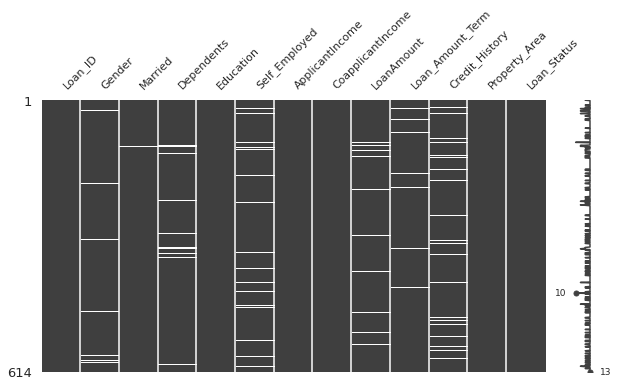

In [ ]:
# visuaizing the missing data
import missingno as msno
msno.matrix(data_train, figsize=(10,5), fontsize=11)
# the white bars visiualize the missing values

In [ ]:
# Cleaning the categorical  features
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# using a function to impute the missing values
features=['Gender', 'Married', 'Dependents',
       'Self_Employed', 'Credit_History','LoanAmount',
       'Loan_Amount_Term']

def categorical_cleaning_mode(data_train, features):
  for feature in features:
    if data_train[feature].dtype =="category":
      # calculating mode of the feature
      mode_value = data_train[feature].mode()[0]
      # impute the missing values with mode
      data_train[feature] = data_train[feature].fillna(mode_value)
    elif data_train[feature].dtype == "float64":
      # calculating mean of the feature
      mean_value = data_train[feature].mean()
      # impute the missing values with mean
      data_train[feature] = data_train[feature].fillna(mean_value)

  return data_train
       

In [ ]:
data_train = categorical_cleaning_mode(data_train, features)
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data_train.duplicated().any()

False

Outlier Detection

In [ ]:
# checking for  for normality using shapiro
cols_to_check= [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
import scipy
from scipy.stats import shapiro

# creating a function
def check_normality(data_train, cols, alpha=0.05):
  for col in cols:
    data= data_train[col]
    stat, p=shapiro(data)
    if p> alpha:
      print("The data is normally distributed (fail to reject H0)")
    else:
      print("The data is not normally distributed(reject H0)")
  
 
check_normality(data_train, cols_to_check)


The data is not normally distributed(reject H0)
The data is not normally distributed(reject H0)
The data is not normally distributed(reject H0)
The data is not normally distributed(reject H0)


In [ ]:
#data_train["ApplicantIncome"].unique()

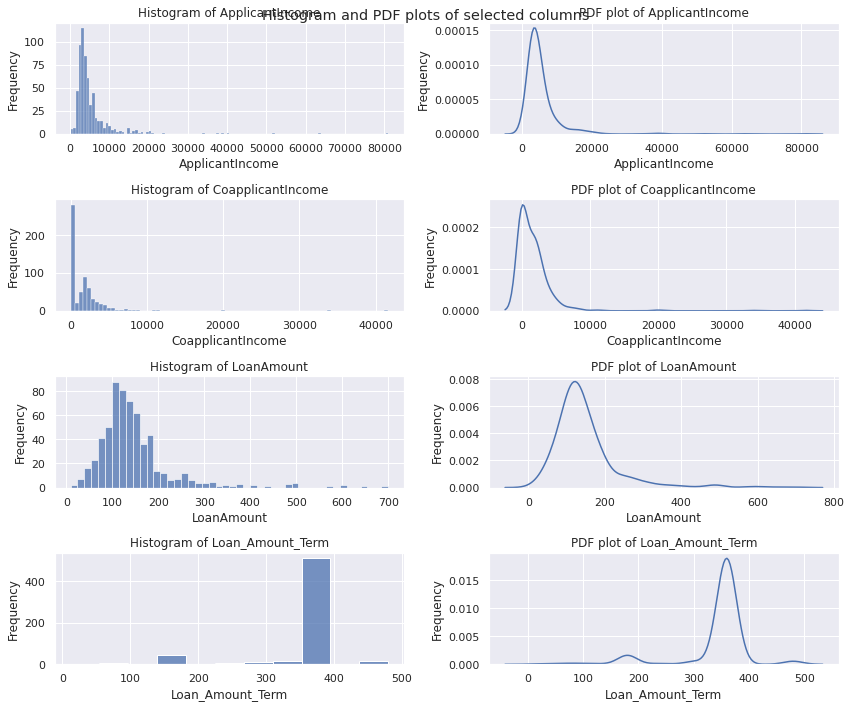

In [ ]:
# checking for the  normality using histograms and pdfs

fig, axes =plt.subplots(nrows=len(cols_to_check), ncols=2, figsize=(12,10))
fig.suptitle("Histogram and PDF plots of selected columns")

# iterate over columns and create plots
for i , col in enumerate(cols_to_check):
  # create histogram plot
  sns.histplot(data_train[col], ax=axes[i][0])
  axes[i][0].set_title(f'Histogram of {col}')
  axes[i][0].set_ylabel('Frequency')

  # create PDF plot
  sns.kdeplot(data_train[col], ax=axes[i][1])
  axes[i][1].set_title(f'PDF plot of {col}')
  axes[i][1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




From the visualization the numeric features are not normally distributed

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

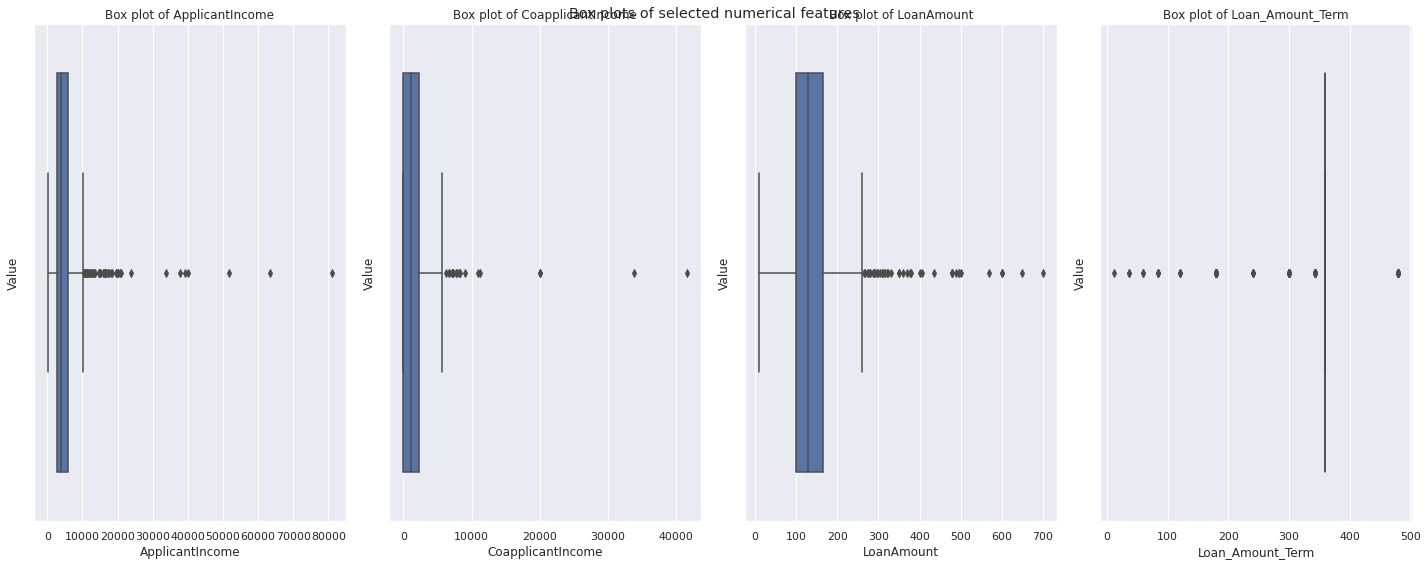

In [ ]:
# checking for outliers usin a boxplot
# create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_check), figsize=(20, 8))
fig.suptitle('Box plots of selected numerical features')

# iterate over columns and create plots
for i, col in enumerate(cols_to_check):
    # create box plot
    sns.boxplot(data_train[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel('Value');

plt.tight_layout();
plt.show();

In [ ]:
# a check point
clean_data = data_train.copy()
clean_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## **Data Analysis**

In [ ]:


  def categorical_analysis(clean_data, target_col, cat_cols):
    
    n_rows = (len(cat_cols) - 1) // 3 + 1
    fig, axs = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    axs = axs.reshape(-1)
    for i, col in enumerate(cat_cols):
        cross_tab = pd.crosstab(clean_data[col], clean_data[target_col])
        ax = axs[i]
        cross_tab.plot(kind="bar", stacked=True, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.set_title(f"{target_col} by {col}")
        ax.legend(title=target_col)
    plt.tight_layout()
    plt.show()
  
   



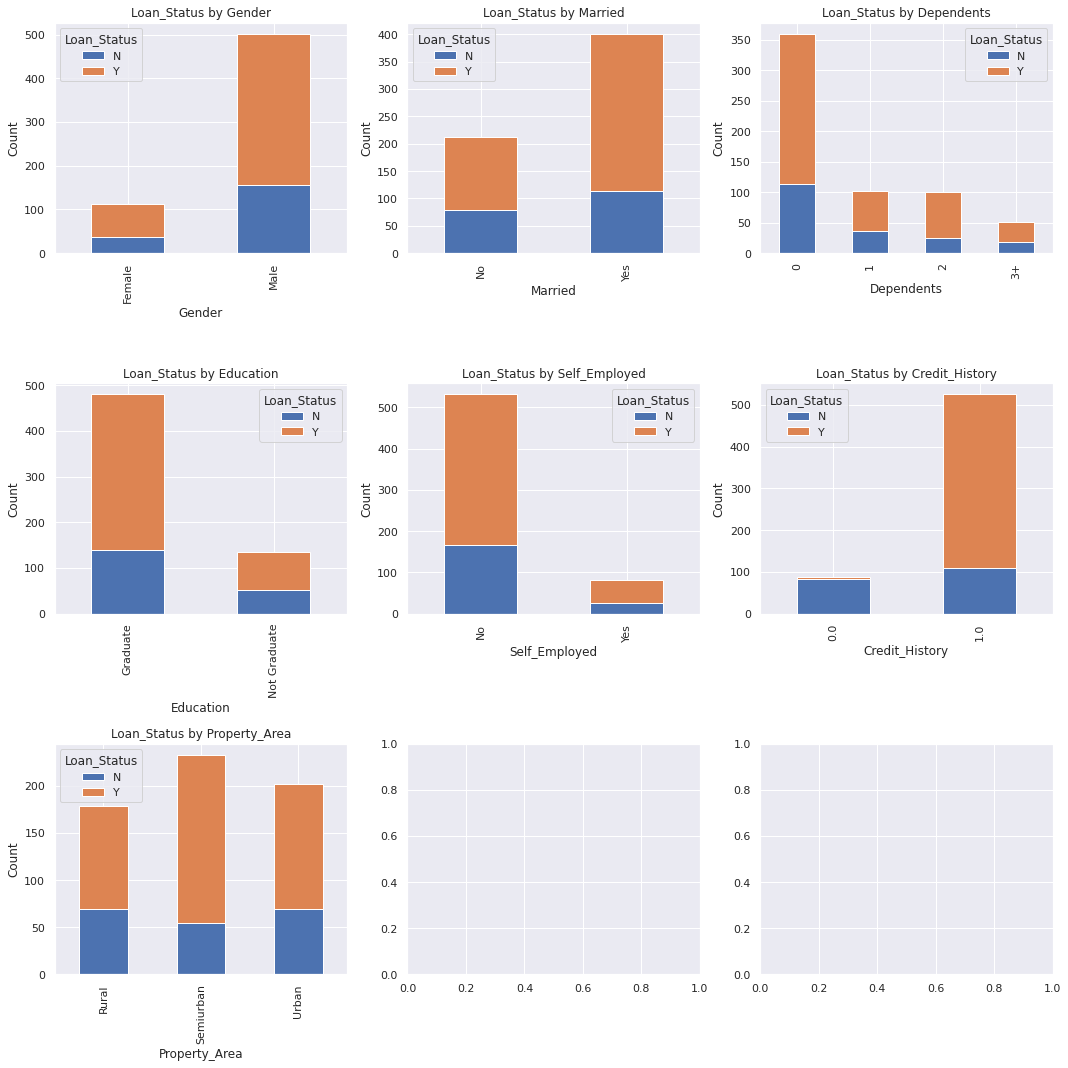

In [ ]:
visuals =categorical_analysis(clean_data, "Loan_Status", ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area',])
visuals


More men and married customers have been granted a loan

Also, close to zero of the customers with a credit history of 0 have a loan status of zero.

More customers with no dependents have a been granted a loan.

Also more graduates have a loan status of 1.

A significant number of the employed customers have a loan status of 1, in comparison to the self-employed customers

Also most of the customers owning properties in semiurban have a loan status of 1 







In [ ]:
clean_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
clean_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

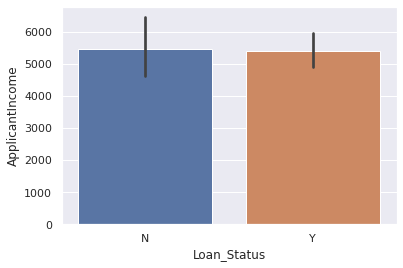

In [ ]:
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=clean_data)

The  loan status is equally distributed on the applicant's income.

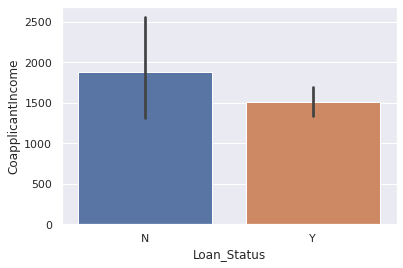

In [ ]:
sns.barplot(x='Loan_Status', y='CoapplicantIncome', data=clean_data)

The customers whose coapplicant is high have a lower chance of getting a loan

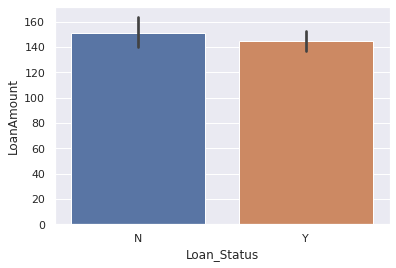

In [ ]:
sns.barplot(x='Loan_Status', y='LoanAmount', data=clean_data)

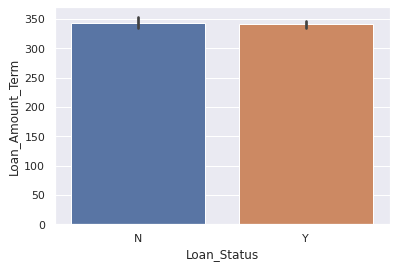

In [ ]:
sns.barplot(x='Loan_Status', y='Loan_Amount_Term', data=clean_data)

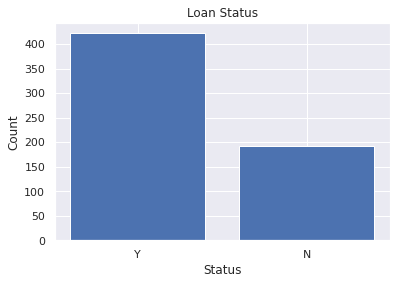

In [ ]:
# Count the number of loans for each status
loan_counts = clean_data['Loan_Status'].value_counts()

# Create a bar chart
plt.bar(loan_counts.index, loan_counts.values)

# Add labels and title
plt.title('Loan Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Show the chart
plt.show()

More customers have a loan status of 1

In [ ]:
def visualize_loan_features(clean_data):
    features = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for i, feature in enumerate(features): #The enumerate function is used to loop over the features and get their index, which is used to calculate the row and column of the corresponding subplot
        row = i // 2
        col = i % 2
        ax = axs[row, col] #The ax variable is used to get a reference to the current subplot
        sns.barplot(x='Loan_Status', y=feature, data=clean_data, ax=ax)
        ax.set_title(feature)

    fig.tight_layout()
    plt.show()

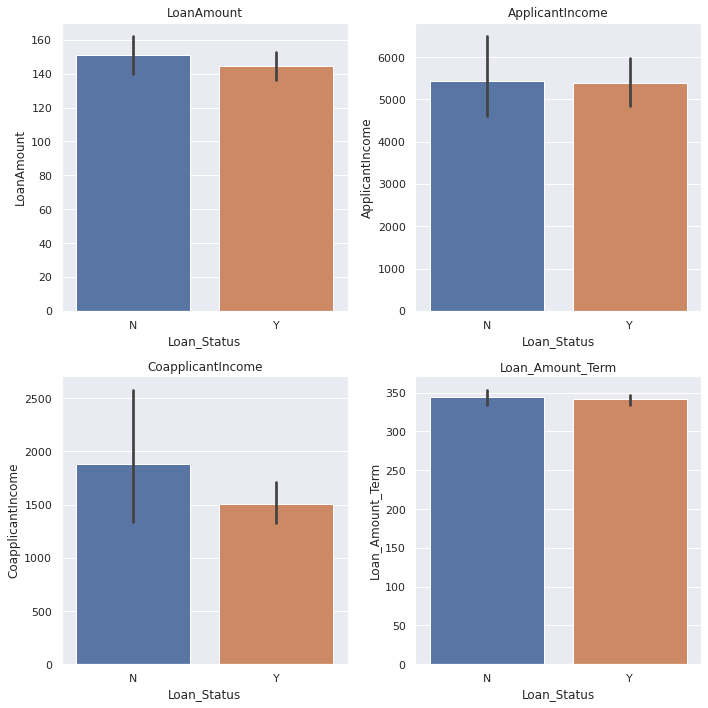

In [ ]:
visualize_loan_features(clean_data)

## **Feature Engineering**

In [ ]:

def encode_categorical_features(clean_data):
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
    encoded_data = pd.get_dummies(clean_data, columns=categorical_cols)
    return encoded_data

In [ ]:
encoded_data= encode_categorical_features(clean_data)
encoded_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,1
1,LP001003,4583,1508.0,128.000000,360.0,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,LP001005,3000,0.0,66.000000,360.0,0,1,0,1,1,...,0,0,1,0,1,0,0,1,0,1
3,LP001006,2583,2358.0,120.000000,360.0,0,1,0,1,1,...,1,1,0,0,1,0,0,1,0,1
4,LP001008,6000,0.0,141.000000,360.0,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,1


In [ ]:
# dropping the loan ID column
encoded_data= encoded_data.drop('Loan_ID', axis=1)


In [ ]:
encoded_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

#create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the numerical data and transform it
encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])
encoded_data.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.072991,-0.554487,0.000000,0.279851,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
1,-0.134412,-0.038732,-0.219273,0.279851,0,1,0,1,0,1,...,0,1,0,0,1,1,0,0,1,0
2,-0.393747,-0.554487,-0.957641,0.279851,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
3,-0.462062,0.251980,-0.314547,0.279851,0,1,0,1,1,0,...,1,1,0,0,1,0,0,1,0,1
4,0.097728,-0.554487,-0.064454,0.279851,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1


## **Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

encoded_data=encoded_data.drop("Loan_Status_N", axis=1)

# Define X and y
y = encoded_data['Loan_Status_Y']
X = encoded_data.drop('Loan_Status_Y', axis=1)



# Define a function to build multiple classification models
def build_models(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a dictionary of model objects
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state),
        'SVM': SVC(random_state=random_state),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB()
    }

    # Train each model and compute the accuracy
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

    return results

In [ ]:
build_models(X, y, test_size=0.2, random_state=42)

{'Logistic Regression': 0.7886178861788617,
 'Decision Tree': 0.6829268292682927,
 'Random Forest': 0.7886178861788617,
 'SVM': 0.7886178861788617,
 'K-Nearest Neighbors': 0.7398373983739838,
 'Naive Bayes': 0.7804878048780488}

Fine Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define X and y
y = encoded_data['Loan_Status_Y']
X = encoded_data.drop('Loan_Status_Y', axis=1)

# Create a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100)

# Train the model
rfc.fit(X, y)

# Extract the feature importance
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
sorted_scores = feature_importances.sort_values(ascending=False)

# Convert back to a DataFrame
feat_scores = pd.DataFrame({"Features": sorted_scores.index, "Importance Score": sorted_scores.values})

# Print the scores
print(feat_scores)


                   Features  Importance Score
0           ApplicantIncome          0.178106
1                LoanAmount          0.177696
2        Credit_History_1.0          0.158479
3        Credit_History_0.0          0.117891
4         CoapplicantIncome          0.105993
5          Loan_Amount_Term          0.044079
6   Property_Area_Semiurban          0.019716
7              Dependents_1          0.018923
8       Property_Area_Rural          0.017617
9                Married_No          0.017257
10             Dependents_0          0.016965
11       Education_Graduate          0.014127
12      Property_Area_Urban          0.013583
13   Education_Not Graduate          0.013562
14            Gender_Female          0.013358
15              Married_Yes          0.012817
16        Self_Employed_Yes          0.012580
17             Dependents_2          0.012514
18         Self_Employed_No          0.011824
19            Dependents_3+          0.011464
20              Gender_Male       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier

def build_models_tune(X, y, test_size=0.2, random_state=42, alpha=1.0):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a dictionary of model objects
    models = {
        'Logistic Regression': Pipeline([
                                ('scaler', StandardScaler()),
                                ('model', LogisticRegression(penalty='l2', C=1/alpha, random_state=random_state))
                             ]),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state),
        'SVM': Pipeline([
                 ('scaler', StandardScaler()),
                 ('model', SVC(C=1/alpha, kernel='linear', random_state=random_state))
             ]),
        'K-Nearest Neighbors': Pipeline([
                        ('scaler', StandardScaler()),
                        ('model', KNeighborsClassifier())
                      ]),
        'Naive Bayes': GaussianNB(),
        'Ridge Classifier': Pipeline([
                                ('scaler', StandardScaler()),
                                ('model', RidgeClassifier(alpha=alpha, normalize=True))
                            ])
    }

    # Train each model and compute the accuracy
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

    return results


In [ ]:
build_models_tune(X, y, test_size=0.2, random_state=42, alpha=1.0)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


{'Logistic Regression': 0.7886178861788617,
 'Decision Tree': 0.6829268292682927,
 'Random Forest': 0.7886178861788617,
 'SVM': 0.7886178861788617,
 'K-Nearest Neighbors': 0.7723577235772358,
 'Naive Bayes': 0.7804878048780488,
 'Ridge Classifier': 0.7886178861788617}

In [ ]:
from sklearn.metrics import confusion_matrix
y = encoded_data['Loan_Status_Y']
X = encoded_data.drop('Loan_Status_Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



def model_eval(X_train, X_test, y_train, y_test):
    models = {'Logistic Regression': LogisticRegression(max_iter=10000), 
              'Decision Tree': DecisionTreeClassifier(), 
              'Random Forest': RandomForestClassifier(), 
              'SVM': SVC(), 
              'K-Nearest Neighbors': KNeighborsClassifier(), 
              'Naive Bayes': GaussianNB(),
              'Ridge Classifier': RidgeClassifier()}

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall) / (precision + recall)
        results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': cm}
    
    return results

# Example usage:
results = model_eval(X_train, X_test, y_train, y_test)
print(results)




{'Logistic Regression': {'Accuracy': 0.7886178861788617, 'Precision': 0.7596153846153846, 'Recall': 0.9875, 'F1 Score': 0.8586956521739131, 'Confusion Matrix': array([[18, 25],
       [ 1, 79]])}, 'Decision Tree': {'Accuracy': 0.7317073170731707, 'Precision': 0.7764705882352941, 'Recall': 0.825, 'F1 Score': 0.8, 'Confusion Matrix': array([[24, 19],
       [14, 66]])}, 'Random Forest': {'Accuracy': 0.7723577235772358, 'Precision': 0.7549019607843137, 'Recall': 0.9625, 'F1 Score': 0.8461538461538461, 'Confusion Matrix': array([[18, 25],
       [ 3, 77]])}, 'SVM': {'Accuracy': 0.7886178861788617, 'Precision': 0.7596153846153846, 'Recall': 0.9875, 'F1 Score': 0.8586956521739131, 'Confusion Matrix': array([[18, 25],
       [ 1, 79]])}, 'K-Nearest Neighbors': {'Accuracy': 0.7398373983739838, 'Precision': 0.7307692307692307, 'Recall': 0.95, 'F1 Score': 0.8260869565217392, 'Confusion Matrix': array([[15, 28],
       [ 4, 76]])}, 'Naive Bayes': {'Accuracy': 0.7804878048780488, 'Precision': 0.75

In [ ]:
# Convert results dictionary to a DataFrame
df = pd.DataFrame.from_dict(results, orient='index')

# Display DataFrame
print(df)

                     Accuracy  Precision  Recall  F1 Score  \
Logistic Regression  0.788618   0.759615  0.9875  0.858696   
Decision Tree        0.731707   0.776471  0.8250  0.800000   
Random Forest        0.772358   0.754902  0.9625  0.846154   
SVM                  0.788618   0.759615  0.9875  0.858696   
K-Nearest Neighbors  0.739837   0.730769  0.9500  0.826087   
Naive Bayes          0.780488   0.757282  0.9750  0.852459   
Ridge Classifier     0.788618   0.759615  0.9875  0.858696   

                         Confusion Matrix  
Logistic Regression   [[18, 25], [1, 79]]  
Decision Tree        [[24, 19], [14, 66]]  
Random Forest         [[18, 25], [3, 77]]  
SVM                   [[18, 25], [1, 79]]  
K-Nearest Neighbors   [[15, 28], [4, 76]]  
Naive Bayes           [[18, 25], [2, 78]]  
Ridge Classifier      [[18, 25], [1, 79]]  


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


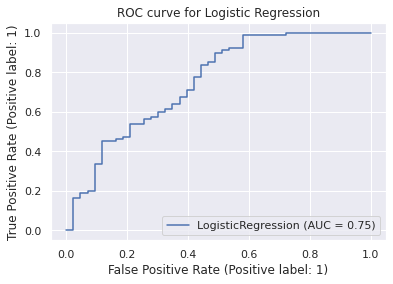

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


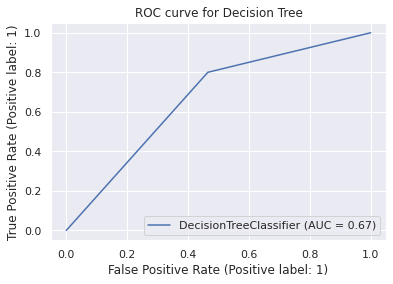

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


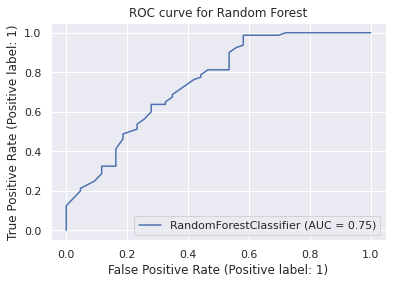

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


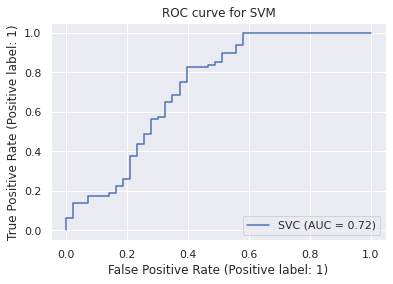

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


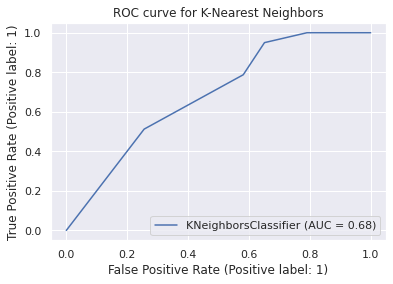

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


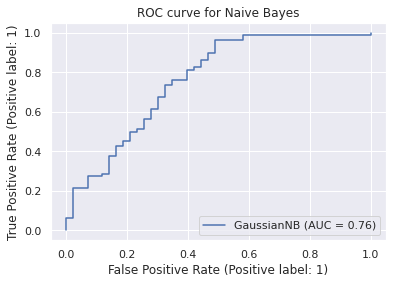

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


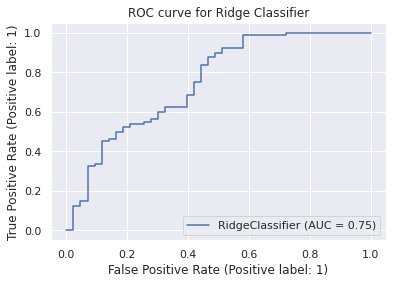

In [ ]:
from sklearn.metrics import plot_roc_curve

for name, model in models.items():
    model.fit(X_train, y_train) # fit the model with training data
    disp = plot_roc_curve(model, X_test, y_test)
    plt.title(f'ROC curve for {name}')
    plt.show();
